## Connect to Drive

In [4]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


## Import Libraries

In [ ]:
!pip install seaborn scikit-learn

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

## Data Analysis

In [6]:
df = pd.read_csv('/content/drive/MyDrive/indeed_dataset.csv')
df.head()

,Unnamed: 0.1,job_id,job_title,location,experience,education,job_type,job_description,job_link,Unnamed: 0
0,0,d3fe7488bead34f4,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,"LIS Business Analyst (Austin, Texas) - job pos...",https://www.indeed.com/jobs?q=Business+Analyst...,0.0
1,1,0c788d52c2a5420e,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Systems Operations Analyst - job post CEVA Log...,https://www.indeed.com/jobs?q=Business+Analyst...,1.0
2,2,ee82dee9280384d9,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Intelligence Analyst - job post Hire ...,https://www.indeed.com/jobs?q=Business+Analyst...,2.0
3,3,8df855078f305a53,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Analyst I - job post Silicon Labs Car...,https://www.indeed.com/jobs?q=Business+Analyst...,3.0
4,4,5a563d5d009c2306,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Intelligence Analyst - job post ABRAC...,https://www.indeed.com/jobs?q=Business+Analyst...,4.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14814 entries, 0 to 14813
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.1     14814 non-null  int64  
 1   job_id           14814 non-null  object 
 2   job_title        14814 non-null  object 
 3   location         14814 non-null  object 
 4   experience       14814 non-null  object 
 5   education        14814 non-null  object 
 6   job_type         14814 non-null  object 
 7   job_description  14814 non-null  object 
 8   job_link         14814 non-null  object 
 9   Unnamed: 0       14814 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 1.1+ MB


In [8]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'job_link', 'job_id'], inplace=True)

In [9]:
df.head()

,job_title,location,experience,education,job_type,job_description
0,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,"LIS Business Analyst (Austin, Texas) - job pos..."
1,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Systems Operations Analyst - job post CEVA Log...
2,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Intelligence Analyst - job post Hire ...
3,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Analyst I - job post Silicon Labs Car...
4,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Intelligence Analyst - job post ABRAC...


In [10]:
# Looking for value counts for each column
for column in df.columns:
  if column == 'job_description':
    continue
  print('-'*50)
  print(f'{column}')
  print('-'*50)
  print(df[column].value_counts())

--------------------------------------------------
job_title
--------------------------------------------------
Software Engineer            3667
Cloud Engineer               2938
Data Analyst                 1956
Data Architect               1499
Business Analyst             1328
Machine Learning Engineer    1045
Data Scientist                887
QA Engineer                   625
Data Engineer                 443
DevOps Engineer               318
QA Analyst                    108
Name: job_title, dtype: int64
--------------------------------------------------
location
--------------------------------------------------
Dallas, TX           3124
San Francisco, CA    2931
Chicago, IL          2052
Austin, TX           1878
Los Angeles, CA      1780
Seattle, WA          1660
San Diego, CA        1389
Name: location, dtype: int64
--------------------------------------------------
experience
--------------------------------------------------
MID_LEVEL       7702
SENIOR_LEVEL    5298
ENTRY_L

In [11]:
df.head()

,job_title,location,experience,education,job_type,job_description
0,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,"LIS Business Analyst (Austin, Texas) - job pos..."
1,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Systems Operations Analyst - job post CEVA Log...
2,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Intelligence Analyst - job post Hire ...
3,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Analyst I - job post Silicon Labs Car...
4,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Intelligence Analyst - job post ABRAC...


In [12]:
# Remove random 10 rows for testing
import random
testing_list = []
for _ in range(10):
  k = random.randint(0, 14800)
  testing_list.append(df.iloc[k])
  df.drop([k], inplace=True)

# Predicting Education based on Job Description

## Data Preprocessing

### Assign Feature and Target Columns

In [13]:
X = df['job_description']
y = df['education']

### Train and Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.2, shuffle=True)

### Vectorizer

In [15]:
# CountVectorizer
vectorizer = CountVectorizer()

In [16]:
# Fitting and Transforming train data
vectorizer.fit(X_train)
X_train_dtm = vectorizer.transform(X_train)
X_train_dtm = vectorizer.fit_transform(X_train)
X_train_dtm

<11843x39498 sparse matrix of type '<class 'numpy.int64'>'
	with 4435860 stored elements in Compressed Sparse Row format>

In [17]:
# Transforming test data
X_test_dtm = vectorizer.transform(X_test)
X_test_dtm

<2961x39498 sparse matrix of type '<class 'numpy.int64'>'
	with 1107079 stored elements in Compressed Sparse Row format>

## Classifiers

### Multinomial Naive Bayes

In [18]:
# Initializing
mnb = MultinomialNB()

In [19]:
# Fitting data to the model
%time mnb.fit(X_train_dtm, y_train)

CPU times: user 90.3 ms, sys: 867 µs, total: 91.2 ms
Wall time: 103 ms


MultinomialNB()

In [20]:
# Predicting
y_pred = mnb.predict(X_test_dtm)

In [21]:
# Accuracy
metrics.accuracy_score(y_test, y_pred)

0.3657548125633232

In [22]:
# Classification Report
target_names = y.unique()
print('Classification Report for "education" column, Multinomial Naive bayes: ')
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report for "education" column, Multinomial Naive bayes: 
                  precision    recall  f1-score   support

BACHELORS_DEGREE       0.36      0.34      0.35      1367
 DOCTORAL_DEGREE       0.31      0.68      0.42       156
  MASTERS_DEGREE       0.38      0.36      0.37      1438

        accuracy                           0.37      2961
       macro avg       0.35      0.46      0.38      2961
    weighted avg       0.37      0.37      0.36      2961



In [23]:
# Confusion Metrics
cm = metrics.confusion_matrix(y_test, y_pred)

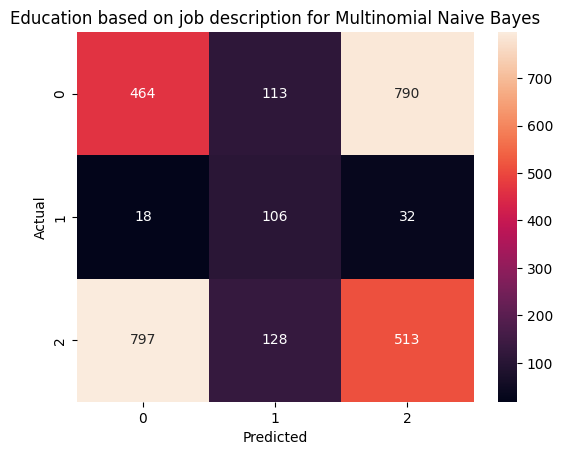

In [24]:
# Plotting Confusion Metrics
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Education based on job description for Multinomial Naive Bayes')
plt.savefig(f'Education_MNB.png')
plt.show()

In [ ]:
mnb.n_features_in_

39608

### Gaussian Naive Bayes

In [ ]:
# Initializing
nb = GaussianNB()

In [ ]:
# Fitting data to the model
%time nb.fit(X_train_dtm.toarray(), y_train)

CPU times: user 5.48 s, sys: 3.85 s, total: 9.33 s
Wall time: 9.36 s


GaussianNB()

In [ ]:
# Predicting
y_pred_nb = nb.predict(X_test_dtm.toarray())

In [ ]:
# Accuracy
metrics.accuracy_score(y_test, y_pred_nb)

0.3458291117865586

In [ ]:
# Classification Report
target_names = y.unique()
print('Classification Report for "education" column, Gaussian Naive bayes: ')
print(classification_report(y_test, y_pred_nb, target_names=target_names))

Classification Report for "education" column, Gaussian Naive bayes: 
                  precision    recall  f1-score   support

BACHELORS_DEGREE       0.37      0.46      0.41      1368
 DOCTORAL_DEGREE       0.32      0.48      0.39       163
  MASTERS_DEGREE       0.31      0.22      0.26      1430

        accuracy                           0.35      2961
       macro avg       0.33      0.39      0.35      2961
    weighted avg       0.34      0.35      0.34      2961



In [ ]:
# Confusion Metrics
cm = metrics.confusion_matrix(y_test, y_pred_nb)

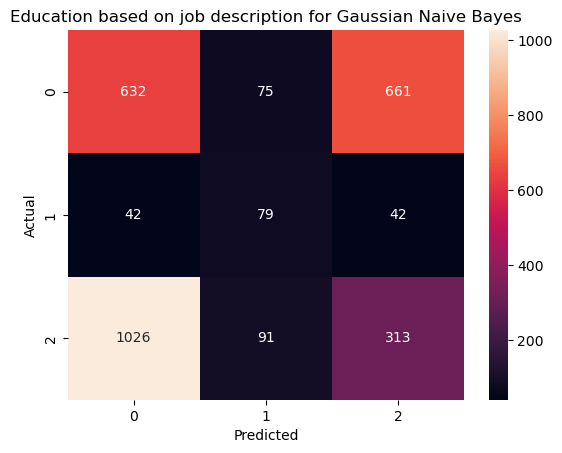

In [ ]:
# Plotting Confusion Metrics
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Education based on job description for Gaussian Naive Bayes')
plt.savefig(f'Education_GNB.png')
plt.show()

In [ ]:
nb.n_features_in_

39608

### Support Vector Machine

In [ ]:
# Initializing
svm_model = svm.SVC(kernel='poly', degree=2)

In [ ]:
# Fitting data to the model
%time svm_model.fit(X_train_dtm, y_train)

CPU times: user 8min 49s, sys: 695 ms, total: 8min 50s
Wall time: 8min 51s


SVC(degree=2, kernel='poly')

In [ ]:
# Predicting
y_pred_svm = svm_model.predict(X_test_dtm)

In [ ]:
# Accuracy
metrics.accuracy_score(y_test, y_pred_svm)

0.4508611955420466

In [ ]:
# Classification Report
target_names = y.unique()
print('Classification Report for "education" column, Support Vector Machine: ')
print(classification_report(y_test, y_pred_svm, target_names=target_names))

Classification Report for "education" column, Support Vector Machine: 
                  precision    recall  f1-score   support

BACHELORS_DEGREE       0.35      0.09      0.14      1368
 DOCTORAL_DEGREE       0.12      0.01      0.01       163
  MASTERS_DEGREE       0.47      0.85      0.60      1430

        accuracy                           0.45      2961
       macro avg       0.31      0.31      0.25      2961
    weighted avg       0.39      0.45      0.36      2961



In [ ]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred_svm)

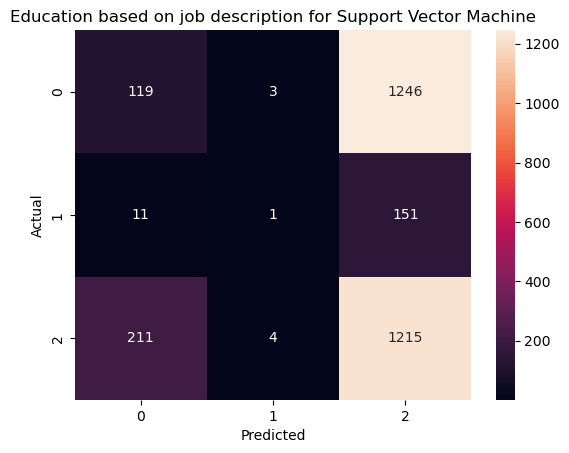

In [ ]:
# Plotting Confusion Metrics
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Education based on job description for Support Vector Machine')
plt.savefig(f'Education_SVM.png')
plt.show()

In [ ]:
svm_model.n_features_in_

39608

### Random Forest Classifier

In [ ]:
# Initializing
rfc = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
# Fitting data to the model
%time rfc.fit(X_train_dtm, y_train)

CPU times: user 502 ms, sys: 996 µs, total: 503 ms
Wall time: 503 ms


RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
# Predicting
y_pred_rf = rfc.predict(X_test_dtm)

In [ ]:
# Accuracy
metrics.accuracy_score(y_test, y_pred_rf)

0.4829449510300574

In [ ]:
# Classification Report
target_names = y.unique()
print('Classification Report for "education" column, Random Forest Classifier: ')
print(classification_report(y_test, y_pred_rf, target_names=target_names))

Classification Report for "education" column, Random Forest Classifier: 
                  precision    recall  f1-score   support

BACHELORS_DEGREE       0.00      0.00      0.00      1368
 DOCTORAL_DEGREE       0.00      0.00      0.00       163
  MASTERS_DEGREE       0.48      1.00      0.65      1430

        accuracy                           0.48      2961
       macro avg       0.16      0.33      0.22      2961
    weighted avg       0.23      0.48      0.31      2961



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Confusion Metrics
cm = metrics.confusion_matrix(y_test, y_pred_rf)

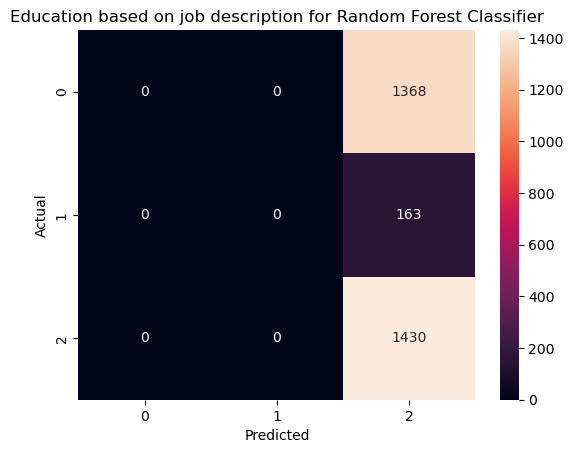

In [ ]:
# Plotting Confusion Metrics
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Education based on job description for Random Forest Classifier')
plt.savefig(f'Education_RF.png')
plt.show()

In [ ]:
rfc.n_features_in_

39608

## Testing

In [ ]:
for model in [mnb, nb, svm_model, rfc]:
  correct_answer = 0
  for k in testing_list:
    job_description = k[5]
    test_data = vectorizer.transform([job_description])
    if model == nb:
      y_pred_test = model.predict(test_data.toarray())
    else:
      y_pred_test = model.predict(test_data)
    if y_pred_test[0] == k[3]:
      correct_answer += 1
    print(f'Real education for ID {k.name} is {k[3]} and predicted education is {y_pred_test[0]}')
  print('-' * 85)
  print(f'{model} Accuracy: {(correct_answer / len(testing_list)) * 100}')
  print('-' * 85)

Real education for ID 2968 is MASTERS_DEGREE and predicted education is BACHELORS_DEGREE
Real education for ID 12918 is MASTERS_DEGREE and predicted education is MASTERS_DEGREE
Real education for ID 3048 is BACHELORS_DEGREE and predicted education is BACHELORS_DEGREE
Real education for ID 7488 is BACHELORS_DEGREE and predicted education is MASTERS_DEGREE
Real education for ID 1220 is BACHELORS_DEGREE and predicted education is MASTERS_DEGREE
Real education for ID 6620 is MASTERS_DEGREE and predicted education is BACHELORS_DEGREE
Real education for ID 14394 is BACHELORS_DEGREE and predicted education is MASTERS_DEGREE
Real education for ID 6323 is MASTERS_DEGREE and predicted education is MASTERS_DEGREE
Real education for ID 2374 is BACHELORS_DEGREE and predicted education is BACHELORS_DEGREE
Real education for ID 4318 is BACHELORS_DEGREE and predicted education is MASTERS_DEGREE
-------------------------------------------------------------------------------------
MultinomialNB() Accura

## Learning Curve

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(5, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

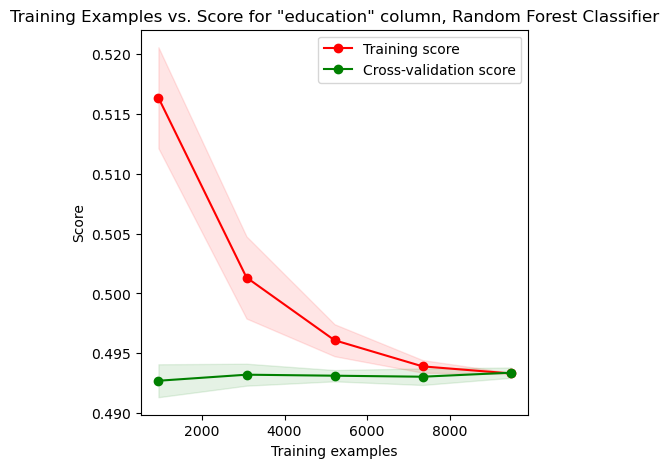

In [ ]:
plot_learning_curve(rfc, 'Training Examples vs. Score for "education" column, Random Forest Classifier', X_train_dtm, y_train)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

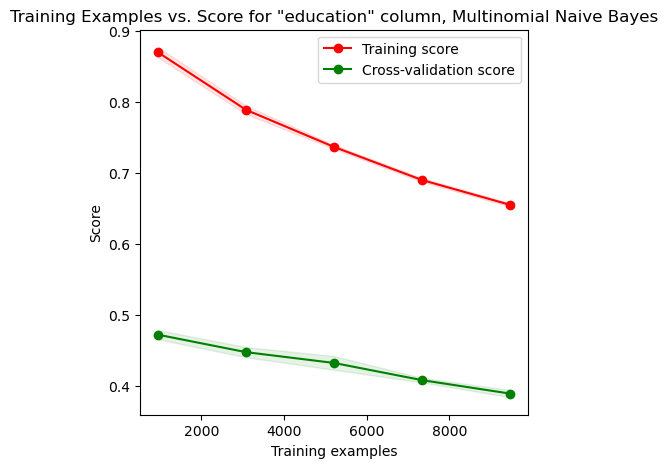

In [ ]:
plot_learning_curve(mnb, 'Training Examples vs. Score for "education" column, Multinomial Naive Bayes', X_train_dtm, y_train)

# Predicting Job Title based on Job Description

## Data Preprocessing

### Assign Feature and Target Columns

In [ ]:
X = df['job_description']
y = df['job_title']

### Train and Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.2, shuffle=True)

### Vectorizer

In [ ]:
# CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
# Fitting and Transforming train data
vectorizer.fit(X_train)
X_train_dtm = vectorizer.transform(X_train)
X_train_dtm = vectorizer.fit_transform(X_train)
X_train_dtm

<11843x39608 sparse matrix of type '<class 'numpy.int64'>'
	with 4441565 stored elements in Compressed Sparse Row format>

In [ ]:
# Transforming test data
X_test_dtm = vectorizer.transform(X_test)
X_test_dtm

<2961x39608 sparse matrix of type '<class 'numpy.int64'>'
	with 1100832 stored elements in Compressed Sparse Row format>

## Classifiers

### Multinomial Naive Bayes

In [ ]:
# Initializing
mnb = MultinomialNB()

In [ ]:
# Fitting data to the model
%time mnb.fit(X_train_dtm, y_train)

CPU times: user 92.6 ms, sys: 1.01 ms, total: 93.6 ms
Wall time: 93.6 ms


MultinomialNB()

In [ ]:
# Predicting
y_pred = mnb.predict(X_test_dtm)

In [ ]:
# Accuracy
metrics.accuracy_score(y_test, y_pred)

0.5558932792975346

In [ ]:
# Classification Report
target_names = y.unique()
print('Classification Report for "job_title" column, Multinomial Naive bayes: ')
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report for "job_title" column, Multinomial Naive bayes: 
                           precision    recall  f1-score   support

         Business Analyst       0.54      0.57      0.55       280
           Cloud Engineer       0.70      0.51      0.59       605
             Data Analyst       0.58      0.63      0.61       372
           Data Architect       0.46      0.55      0.50       291
            Data Engineer       0.43      0.35      0.39        82
           Data Scientist       0.54      0.51      0.53       185
          DevOps Engineer       0.39      0.42      0.41        74
Machine Learning Engineer       0.31      0.38      0.34       206
               QA Analyst       1.00      0.20      0.33        20
              QA Engineer       0.53      0.61      0.57       120
        Software Engineer       0.63      0.65      0.64       726

                 accuracy                           0.56      2961
                macro avg       0.56      0.49      0.5

In [ ]:
# Confusion Metrics
cm = metrics.confusion_matrix(y_test, y_pred)

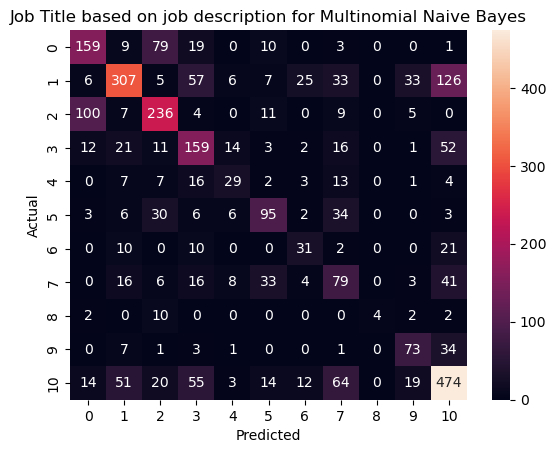

In [ ]:
# Plotting Confusion Metrics
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Job Title based on job description for Multinomial Naive Bayes')
plt.savefig(f'Job_Title_MNB.png')
plt.show()

In [ ]:
mnb.n_features_in_

39608

### Gaussian Naive Bayes

In [ ]:
# Initializing
nb = GaussianNB()

In [ ]:
# Fitting data to the model
%time nb.fit(X_train_dtm.toarray(), y_train)

CPU times: user 5.47 s, sys: 3.71 s, total: 9.18 s
Wall time: 9.21 s


GaussianNB()

In [ ]:
# Predicting
y_pred_nb = nb.predict(X_test_dtm.toarray())

In [ ]:
# Accuracy
metrics.accuracy_score(y_test, y_pred_nb)

0.5869638635596083

In [ ]:
# Classification Report
target_names = y.unique()
print('Classification Report for "job_title" column, Gaussian Naive bayes: ')
print(classification_report(y_test, y_pred_nb, target_names=target_names))

Classification Report for "job_title" column, Gaussian Naive bayes: 
                           precision    recall  f1-score   support

         Business Analyst       0.54      0.56      0.55       280
           Cloud Engineer       0.63      0.59      0.61       605
             Data Analyst       0.67      0.58      0.62       372
           Data Architect       0.57      0.60      0.58       291
            Data Engineer       0.43      0.68      0.53        82
           Data Scientist       0.54      0.63      0.58       185
          DevOps Engineer       0.45      0.68      0.54        74
Machine Learning Engineer       0.41      0.35      0.38       206
               QA Analyst       1.00      0.70      0.82        20
              QA Engineer       0.61      0.70      0.65       120
        Software Engineer       0.64      0.60      0.62       726

                 accuracy                           0.59      2961
                macro avg       0.59      0.61      0.59  

In [ ]:
# Confusion Metrics
cm = metrics.confusion_matrix(y_test, y_pred_nb)

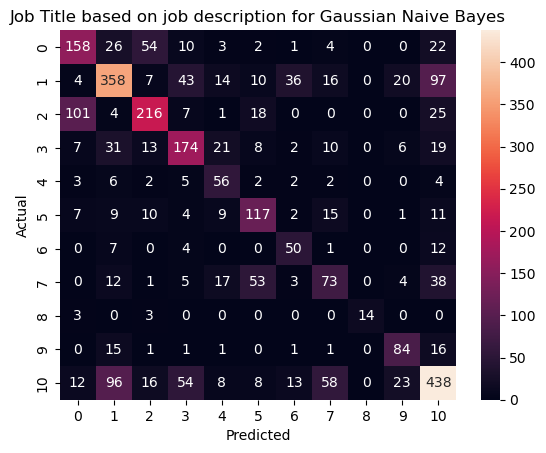

In [ ]:
# Plotting Confusion Metrics
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Job Title based on job description for Gaussian Naive Bayes')
plt.savefig(f'Job_Title_GNB.png')
plt.show()

In [ ]:
nb.n_features_in_

39608

### Support Vector Machine

In [ ]:
# Initializing
svm_model = svm.SVC(kernel='poly', degree=2)

In [ ]:
# Fitting data to the model
%time svm_model.fit(X_train_dtm, y_train)

CPU times: user 6min 47s, sys: 414 ms, total: 6min 47s
Wall time: 6min 48s


SVC(degree=2, kernel='poly')

In [ ]:
# Predicting
y_pred_svm = svm_model.predict(X_test_dtm)

In [ ]:
# Accuracy
metrics.accuracy_score(y_test, y_pred_svm)

0.5569064505234718

In [ ]:
# Classification Report
target_names = y.unique()
print('Classification Report for "job_title" column, Support Vector Machine: ')
print(classification_report(y_test, y_pred_svm, target_names=target_names))

Classification Report for "job_title" column, Support Vector Machine: 
                           precision    recall  f1-score   support

         Business Analyst       0.64      0.34      0.44       280
           Cloud Engineer       0.66      0.50      0.57       605
             Data Analyst       0.60      0.78      0.68       372
           Data Architect       0.67      0.42      0.51       291
            Data Engineer       0.39      0.24      0.30        82
           Data Scientist       0.68      0.49      0.57       185
          DevOps Engineer       0.50      0.05      0.10        74
Machine Learning Engineer       0.38      0.28      0.32       206
               QA Analyst       1.00      0.40      0.57        20
              QA Engineer       0.64      0.41      0.50       120
        Software Engineer       0.48      0.84      0.61       726

                 accuracy                           0.56      2961
                macro avg       0.61      0.43      0.47

In [ ]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred_svm)

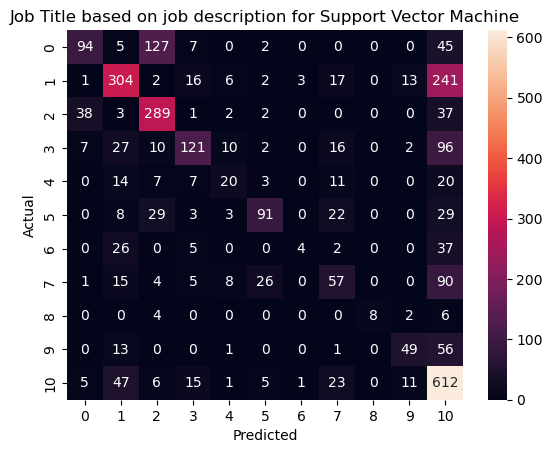

In [ ]:
# Plotting Confusion Metrics
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Job Title based on job description for Support Vector Machine')
plt.savefig(f'Job_Title_SVM.png')
plt.show()

In [ ]:
svm_model.n_features_in_

39608

### Random Forest Classifier

In [ ]:
# Initializing
rfc = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
# Fitting data to the model
%time rfc.fit(X_train_dtm, y_train)

CPU times: user 518 ms, sys: 2.01 ms, total: 520 ms
Wall time: 520 ms


RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
# Predicting
y_pred_rf = rfc.predict(X_test_dtm)

In [ ]:
# Accuracy
metrics.accuracy_score(y_test, y_pred_rf)

0.2759202971968929

In [ ]:
# Classification Report
target_names = y.unique()
print('Classification Report for "job_title" column, Random Forest Classifier: ')
print(classification_report(y_test, y_pred_rf, target_names=target_names))

Classification Report for "job_title" column, Random Forest Classifier: 
                           precision    recall  f1-score   support

         Business Analyst       0.00      0.00      0.00       280
           Cloud Engineer       0.83      0.15      0.25       605
             Data Analyst       0.50      0.01      0.02       372
           Data Architect       0.00      0.00      0.00       291
            Data Engineer       0.00      0.00      0.00        82
           Data Scientist       0.00      0.00      0.00       185
          DevOps Engineer       0.00      0.00      0.00        74
Machine Learning Engineer       0.00      0.00      0.00       206
               QA Analyst       0.00      0.00      0.00        20
              QA Engineer       0.00      0.00      0.00       120
        Software Engineer       0.25      1.00      0.41       726

                 accuracy                           0.28      2961
                macro avg       0.14      0.11      0.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Confusion Metrics
cm = metrics.confusion_matrix(y_test, y_pred_rf)

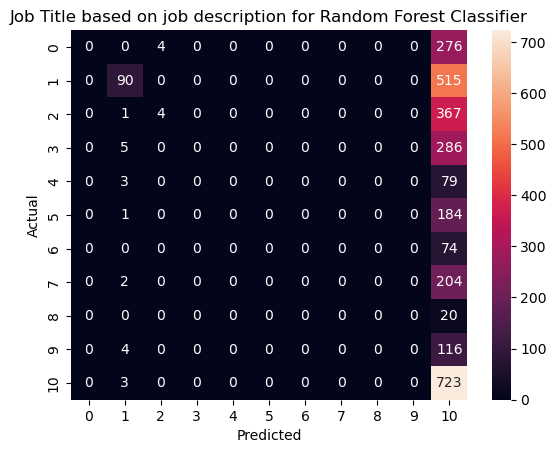

In [ ]:
# Plotting Confusion Metrics
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Job Title based on job description for Random Forest Classifier')
plt.savefig(f'Job_Title_RF.png')
plt.show()

In [ ]:
rfc.n_features_in_

39608

## Testing

In [ ]:
for model in [mnb, nb, svm_model, rfc]:
  correct_answer = 0
  for k in testing_list:
    job_description = k[5]
    test_data = vectorizer.transform([job_description])
    if model == nb:
      y_pred_test = model.predict(test_data.toarray())
    else:
      y_pred_test = model.predict(test_data)
    if y_pred_test[0] == k[0]:
      correct_answer += 1
    print(f'Real experience for ID {k.name} is {k[0]} and predicted experience is {y_pred_test[0]}')
  print('-' * 85)
  print(f'{model} Accuracy: {(correct_answer / len(testing_list)) * 100}')
  print('-' * 85)

Real experience for ID 2968 is Cloud Engineer and predicted experience is Software Engineer
Real experience for ID 12918 is Software Engineer and predicted experience is Software Engineer
Real experience for ID 3048 is Cloud Engineer and predicted experience is Cloud Engineer
Real experience for ID 7488 is Data Architect and predicted experience is Data Architect
Real experience for ID 1220 is Business Analyst and predicted experience is Business Analyst
Real experience for ID 6620 is Data Architect and predicted experience is Data Architect
Real experience for ID 14394 is Software Engineer and predicted experience is Software Engineer
Real experience for ID 6323 is Data Architect and predicted experience is Software Engineer
Real experience for ID 2374 is Cloud Engineer and predicted experience is Cloud Engineer
Real experience for ID 4318 is Data Analyst and predicted experience is Data Analyst
-------------------------------------------------------------------------------------
Mult

## Learning Curve

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

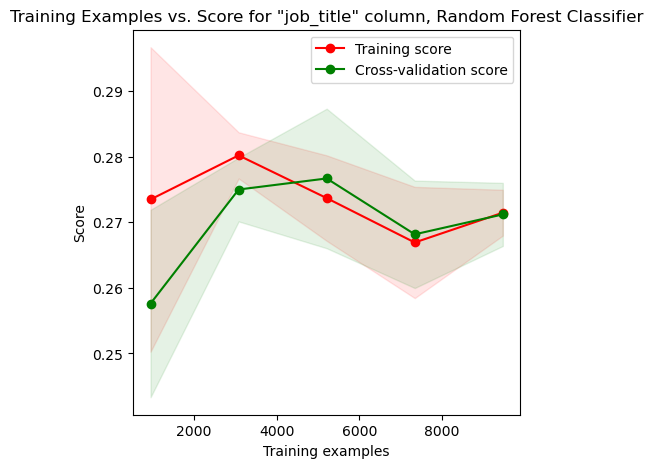

In [ ]:
plot_learning_curve(rfc, 'Training Examples vs. Score for "job_title" column, Random Forest Classifier', X_train_dtm, y_train)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

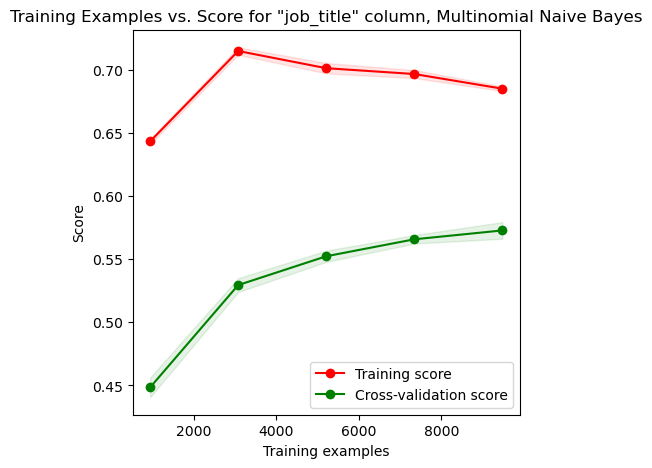

In [ ]:
plot_learning_curve(mnb, 'Training Examples vs. Score for "job_title" column, Multinomial Naive Bayes', X_train_dtm, y_train)